<a href="https://colab.research.google.com/github/MohanaSrinitha/Mohana_INF05731_Spring2024/blob/main/Shaga_Mohana_Assignmnet_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
# Write your code here
#installing selenium package
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [802 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,358 kB]
Get:13 http://archive.ubuntu.com/ubun

In [2]:
!pip install playwright
!playwright install
from playwright.async_api import async_playwright

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 6.9 MB/s eta 0:00:00
154.7 MiB [] 0% 0.0s154.7 MiB [] 0% 63.3s154.7 MiB [] 0% 35.2s154.7 MiB [] 0% 26.4s154.7 MiB [] 0% 22.7s154.7 MiB [] 0% 17.5s154.7 MiB [] 0% 16.0s154.7 MiB [] 0% 14.6s154.7 MiB [] 1% 14.2s154.7 MiB [] 1% 13.6s154.7 MiB [] 1% 13.3s154.7 MiB [] 1% 13.0s154.7 MiB [] 1% 12.7s154.7 MiB [] 1% 12.3s154.7 MiB [] 2% 11.9s154.7 MiB [] 2% 12.1s154.7 MiB [] 2% 12.0s154.7 MiB [] 2% 12.6s154.7 MiB [] 2% 12.2s154.7 MiB [] 2% 12.4s154.7 MiB [] 3% 12.6s154.7 MiB [] 3% 12.8s154.7 MiB [] 3% 12.5s154.7 MiB [] 3% 12.0s154.7 MiB [] 3% 12.1s154.7 MiB [] 3% 12.2s154.7 MiB [] 3% 12.4s154.7 MiB [] 4% 12.0s154.7 MiB [] 4% 12.1s154.7 MiB [] 4% 11.9s154.7 MiB [] 4% 11.8s154.7 MiB [] 4% 12.1s154.7 MiB [] 5% 12.3s154.7 MiB [] 5% 12.6s154.7 MiB [] 5% 12.9s154.7 MiB [] 5% 13.2s154.7 MiB [] 5% 13.4s154.7 MiB [] 5% 13.7s154.7 MiB [] 5% 13.8s154.7 MiB [] 5% 14.1s154.7 MiB [] 5% 14.2s154.7 MiB [] 5% 14.3s154.7 MiB [] 6% 14.3s154.7 MiB [] 6% 14

In [15]:
import csv
import pandas as pd
from playwright.async_api import async_playwright


movie_id = 'tt15398776'  # Oppenheimer
url = f'https://www.imdb.com/title/{movie_id}/reviews'

reviews = []
titles = []  # List to store titles of reviews
async with async_playwright() as p:
    browser = await p.chromium.launch(headless=True)
    page = await browser.new_page()
    await page.goto(url)

    page_counter = 0
    while page_counter < 6:
        load_more_button = await page.query_selector('.ipl-load-more__button')
        if load_more_button:
            await load_more_button.click()
            await page.wait_for_load_state('networkidle', timeout=60000)
            page_counter += 1
        else:
            break
    review_elements = await page.query_selector_all('.review-container')
    for review_element in review_elements:
        # Extract review text
        review_text = await review_element.query_selector('.text.show-more__control')
        reviews.append(await review_text.inner_text())

        # Extract review title
        review_title = await review_element.query_selector('.title')
        titles.append(await review_title.inner_text())

    await browser.close()

    # Save reviews and titles to a CSV file
    csv_file = 'imdb_reviews.csv'
    with open(csv_file, 'w', newline='', encoding='utf-8') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(['Title', 'Review'])
        for title, review in zip(titles, reviews):
            csvwriter.writerow([title, review])
    print(f"{len(reviews)} reviews have been saved to {csv_file}.")

# Read the saved CSV file and print the first few rows
df = pd.read_csv('imdb_reviews.csv')
print(df.head())
print(f'Shape of the data frame: {df.shape}')
df

150 reviews have been saved to imdb_reviews.csv.
                                               Title  \
0  A challenging watch to be sure, but a worthwhi...   
1                              Murphy is exceptional   
2                             Quality but exhausting   
3  A brilliantly layered examination of a man thr...   
4  Nolan delivers a powerfull biopic that shows t...   

                                              Review  
0  One of the most anticipated films of the year ...  
1  You'll have to have your wits about you and yo...  
2  I'm a big fan of Nolan's work so was really lo...  
3  "Oppenheimer" is a biographical thriller film ...  
4  This movie is just... wow! I don't think I hav...  
Shape of the data frame: (150, 2)


,Title,Review
0,"A challenging watch to be sure, but a worthwhi...",One of the most anticipated films of the year ...
1,Murphy is exceptional,You'll have to have your wits about you and yo...
2,Quality but exhausting,I'm a big fan of Nolan's work so was really lo...
3,A brilliantly layered examination of a man thr...,"""Oppenheimer"" is a biographical thriller film ..."
4,Nolan delivers a powerfull biopic that shows t...,This movie is just... wow! I don't think I hav...
...,...,...
145,Just not good.,I'm a huge Nolan fan since his first film. My ...
146,Oppenheimer,"Back in 1989, there was a Roland Joffe's film:..."
147,Brilliant bio of a deeply flawed genius,The fastest moving 3 hour movie I've ever seen...
148,"A decent experience, still not perfect","The film's abundance of characters, combined w..."


In [4]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
import nltk

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("omw-1.4")

# Read data
data_url = "imdb_reviews.csv"
train = pd.read_csv(data_url)

# Check for missing values
print(train.isnull().sum())

# Fill missing values in 'Review' column with empty string
train['Review'].fillna('', inplace=True)

# Word count
train['word_count'] = train['Review'].apply(lambda x: len(str(x).split(" ")))
print(train['word_count'].head())

# Remove noise such as special characters
train['remove_noise'] = train['Review'].apply(lambda x: re.sub('[^A-Za-z0-9\s]+', '', x))
print(train['remove_noise'].head())

# Remove punctuation
train['remove_punctuation'] = train['Review'].str.replace('[^\w\s]','')
print(train['remove_punctuation'].head())

# Remove numbers
train['remove_numbers'] = train['Review'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
print(train['remove_numbers'].head())

# Remove stopwords
stop = stopwords.words('english')
train['remove_stopwords'] = train['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
print(train['remove_stopwords'].head())

# Lowercase all texts
train['lowercase_all_texts'] = train['Review'].apply(lambda x: " ".join(word.lower() for word in x.split()))
print(train['lowercase_all_texts'].head())

# Stemming
st = PorterStemmer()
train['stemmed_text'] = train['Review'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
print(train['stemmed_text'].head())

# Lemmatization
train['lemmatized_text'] = train['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
print(train['lemmatized_text'].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Title     0
Review    0
dtype: int64
0     356
1     249
2     160
3    1566
4     186
Name: word_count, dtype: int64
0    One of the most anticipated films of the year ...
1    Youll have to have your wits about you and you...
2    Im a big fan of Nolans work so was really look...
3    Oppenheimer is a biographical thriller film wr...
4    This movie is just wow I dont think I have eve...
Name: remove_noise, dtype: object
0    One of the most anticipated films of the year ...
1    You'll have to have your wits about you and yo...
2    I'm a big fan of Nolan's work so was really lo...
3    "Oppenheimer" is a biographical thriller film ...
4    This movie is just... wow! I don't think I hav...
Name: remove_punctuation, dtype: object
0    One of the most anticipated films of the year ...
1    You'll have to have your wits about you and yo...
2    I'm a big fan of Nolan's work so was really lo...
3    "Oppenheimer" is a biographical thriller film ...
4    This movie is just... wow! I don'

In [5]:
import pandas as pd
from nltk import ngrams
from collections import Counter

# Assuming 'df' is your DataFrame with the 'Review' column
# Drop rows with missing values in the 'Review' column
df = df.dropna(subset=['Review'])

# Tokenize the text and generate the N-grams
tokens = df['Review'].apply(lambda x: x.lower().split())
trigrams = tokens.apply(lambda x: list(ngrams(x, 3)))

# Count the frequency of each trigram
trigram_counts = Counter([item for sublist in trigrams for item in sublist])

# Print the top 10 most frequent trigrams
print(trigram_counts.most_common(10))


[(('one', 'of', 'the'), 47), (('the', 'atomic', 'bomb'), 26), (('of', 'the', 'atomic'), 26), (('this', 'movie', 'is'), 25), (('of', 'the', 'most'), 22), (('the', 'film', 'is'), 21), (('a', 'lot', 'of'), 21), (('this', 'is', 'a'), 17), (('robert', 'downey', 'jr.'), 17), (('oppenheimer', 'is', 'a'), 17)]


In [6]:
import pandas as pd
import nltk
from nltk.util import ngrams
import nltk
nltk.download('punkt')

# Tokenize the text into individual words
df['tokens'] = df['Review'].apply(nltk.word_tokenize)

# Generate all bigrams in the text
df['bigrams'] = df['tokens'].apply(lambda x: list(ngrams(x, 2)))

# Count the frequency of each word in the text
word_freq = {}
for tokens in df['tokens']:
    for token in tokens:
        if token in word_freq:
            word_freq[token] += 1
        else:
            word_freq[token] = 1

# Calculate the probability of each bigram
bigram_prob = {}
for bigrams in df['bigrams']:
    for bigram in bigrams:
        w2, w1 = bigram
        count_w2_w1 = bigrams.count(bigram)
        count_w2 = word_freq[w2]
        bigram_prob[bigram] = count_w2_w1 / count_w2

# Print the probabilities for all bigrams
for bigram, prob in bigram_prob.items():
    print(f'{bigram}: {prob}')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Streaming output truncated to the last 5000 lines.
('and', '....'): 0.0007385524372230429
('....', 'with'): 0.2
('hour', 'run'): 0.034482758620689655
('time', '...'): 0.007194244604316547
('...', 'does'): 0.03225806451612903
('does', 'drag'): 0.014925373134328358
('drag', 'a'): 1.0
('bit', 'at'): 0.03225806451612903
('But', 'these'): 0.017543859649122806
('these', 'are'): 0.022727272727272728
('are', 'quibbles'): 0.004739336492890996
('quibbles', 'to'): 1.0
('``', 'as'): 0.0072992700729927005
('it', 'gets'): 0.0015600624024961
('gets', "''"): 0.06666666666666667
('the', 'BEST'): 0.0003786444528587656
('BEST', 'DIRECTOR'): 0.5
('DIRECTOR', 'plying'): 1.0
('plying', 'his'): 1.0
('his', 'trade'): 0.0033333333333333335
('trade', 'today'): 1.0
('another', 'triumph'): 0.043478260869565216
('triumph', 'for'): 1.0
('be', 'making'): 0.005235602094240838
('making', 'many'): 0.03571428571428571
('many', 'acceptance'): 0.014492753623188406
('acceptance', 'speeches'): 1.0
('speeches', 'in'): 0.5
('

In [7]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [9]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define function to extract noun phrases from a text
def extract_noun_phrases(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tagged_tokens = nltk.pos_tag(word_tokenize(text))
    noun_phrases = []
    for i in range(len(tagged_tokens)):
        if tagged_tokens[i][1].startswith('NN'):
            np = tagged_tokens[i][0]
            j = i + 1
            while j < len(tagged_tokens) and tagged_tokens[j][1].startswith('NN'):
                np += ' ' + tagged_tokens[j][0]
                j += 1
            np = lemmatizer.lemmatize(np.lower())
            if np not in stop_words:
                noun_phrases.append(np)
    return noun_phrases

# Read the reviews from the file
#with open('reviews.csv') as f:
#   reviews = f.read().splitlines()

# Read the reviews from the file using UTF-8 encoding
with open('imdb_reviews.csv', encoding='utf-8') as f:
    reviews = f.read().splitlines()


# Extract noun phrases from each review and calculate their frequencies
all_noun_phrases = defaultdict(int)
review_noun_phrases = []
for review in reviews:
    noun_phrases = extract_noun_phrases(review)
    review_noun_phrases.append(noun_phrases)
    for np in noun_phrases:
        all_noun_phrases[np] += 1

# Calculate the maximum frequency of each noun phrase
max_frequencies = {}
for np in all_noun_phrases:
    max_frequencies[np] = max([all_noun_phrases[np] for np_list in review_noun_phrases])

# Calculate the relative probabilities of each review
review_probs = []
for i in range(len(reviews)):
    probs = {}
    for np in review_noun_phrases[i]:
        probs[np] = all_noun_phrases[np] / max_frequencies[np]
    review_probs.append(probs)

# Write the results to a file
with open('output.txt', 'w') as output_file:
    output_file.write('\t' + '\t'.join(all_noun_phrases.keys()) + '\n')
    for i in range(len(reviews)):
        row = [str(i+1)]
        for np in all_noun_phrases:
            if np in review_probs[i]:
                row.append(str(review_probs[i][np]))
            else:
                row.append('0')
        output_file.write('\t'.join(row) + '\n')

print("Output has been written to 'output.txt'.")
#I have printed the output to a file as the colab is getting struck if I printed it in the console.
#I have also attched the link to output txt file below .
#link- https://raw.githubusercontent.com/MohanaSrinitha/Mohana_INF05731_Spring2024/main/output.txt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Output has been written to 'output.txt'.


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [8]:
# Write your code here
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Preprocess the data
stop_words = set(stopwords.words('english'))
preprocessed_reviews = []
for texts in df['Review']:
    # Tokenize the texts
    tokens = word_tokenize(texts.lower())
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Join the tokens back into a string
    preprocessed_review = ' '.join(tokens)
    preprocessed_reviews.append(preprocessed_review)

# Compute TF-IDF weights
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_reviews)

# Define the query
query = "This movie is an insightful examination of the moral challenges that the scientist responsible for the atomic bomb confronted. "

# Preprocess the query
query_tokens = word_tokenize(query.lower())
query_tokens = [token for token in query_tokens if token not in stop_words]
query = ' '.join(query_tokens)

# Compute the cosine similarity between the query and the documents
query_tfidf = tfidf_vectorizer.transform([query])
cosine_similarities = cosine_similarity(query_tfidf, tfidf_matrix).flatten()

# Rank the documents by their similarity to the query
document_scores = list(zip(range(len(cosine_similarities)), cosine_similarities))
document_scores.sort(key=lambda x: x[1], reverse=True)

# Print the top 10 most similar documents to the query
for i in range(10):
    document_index = document_scores[i][0]
    document_score = document_scores[i][1]
    print(f"Document {document_index + 1} - Score: {document_score}")
    print(df.loc[document_index, 'Review'])
    print("\n")

Document 88 - Score: 0.10154052569055357
Like many this weekend, I spend it in a pact theatre watching one of the most hyped-up movies this summer. Unfortunately for me, not only was the theatre packed but the air-conditioning was out of order too, so it got warm and humid in there quick. If it weren't for this, I could tell whether some of the people in the audience left the movie because they weren't interested (in particular - there were a pair of girls next to me whom kept checking their phones - I counted six instances before they left around the time Jean Tatlock died. I didn't check the time so I can't tell how far into the movie that was) or due to the heat in the theater.

The movie itself didn't meet up my expectations but I still managed to enjoy it. Does that mean my expectations are too high or did the movie simply not appeal to me? Well, let's try to answer that by discussing for whom this movie is - in other words, what's the prototype of the viewer this movie is build f

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


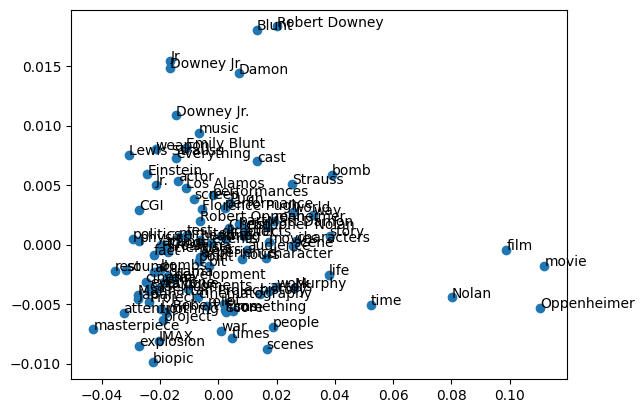

In [10]:
# Write your code here
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.chunk import RegexpParser
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

# read in the data
df = pd.read_csv('imdb_reviews.csv')

# check for missing values and replace with empty strings
df['Review'].fillna('', inplace=True)

# extract all noun phrases from each review
noun_phrases = []
for review in df['Review']:
    tokens = word_tokenize(review)
    pos_tags = nltk.pos_tag(tokens)
    noun_chunks = []
    for i in range(len(pos_tags)):
        if pos_tags[i][1].startswith('NN'):
            noun_chunks.append(pos_tags[i][0])
            if i < len(pos_tags)-1 and pos_tags[i+1][1].startswith('NN'):
                noun_chunks[-1] += ' ' + pos_tags[i+1][0]
    noun_phrases.append(noun_chunks)

# convert float values to strings
sentences = [[str(word) for word in sentence] for sentence in noun_phrases]

# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, workers=4)

# Save the model
model.save("word2vec.model")

# Visualize the Word2Vec model
words = list(model.wv.index_to_key)[:100]
X = model.wv[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# plot the scatter plot of the words
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [12]:
# The GitHub link of your final csv file


# Link: https://github.com/MohanaSrinitha/Mohana_INF05731_Spring2024/blob/main/assignment3-data.csv






# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [14]:
# Type your answer
In this assignmnet, there are three topics that are covered .They are N-gram analysis, TF-IDF and word embedding models.from each of these questions
I have learnt about how they involve in the text analysis in NLP.From the N-gram analysis, I have understood that it is used for efficient
computation for large datasets.Calculating probabilities for bigrams and extracting noun phrases require careful handling of text data and
statistical calculations.From the TF-IDF and document representation part involves building a matrix of document-term weights and ranking documents
based on cosine similarity. Again, implementing these algorithms from scratch requires a good understanding of the underlying principles of NLP and
linear algebra. Finally I learnt how to create a word embedding model and how to train a 300-dimensional word embedding from scratch .And finally the
visualization of the embedding model  which provides a better understanding and interpretation of word embeddings.

In this assignmnet, there are three topics that are covered .They are N-gram analysis, TF-IDF and word embedding models.from each of these questions
I have learnt about how they involve in the text analysis in NLP.From the N-gram analysis, I have understood that it is used for efficient
computation for large datasets.Calculating probabilities for bigrams and extracting noun phrases require careful handling of text data and
statistical calculations.From the TF-IDF and document representation part involves building a matrix of document-term weights and ranking documents
based on cosine similarity. Again, implementing these algorithms from scratch requires a good understanding of the underlying principles of NLP and
linear algebra. Finally I learnt how to create a word embedding model and how to train a 300-dimensional word embedding from scratch .And finally the
visualization of the embedding model  which provides a better understanding and interpretation of word embeddings.